In [3]:
import matplotlib.pyplot as plt
from pyhive import hive

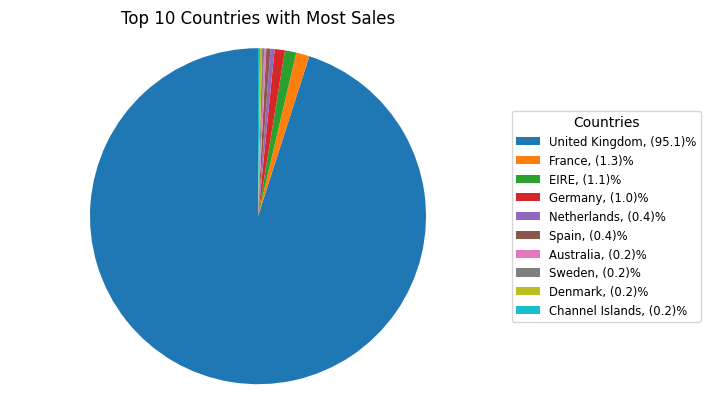

In [4]:
countries = []
sales = []
total = 0

conn = hive.Connection(host="172.16.215.135", port=10000, username="cloudera")
cursor = conn.cursor()

query = """SELECT Country, COUNT(*) AS sales
FROM retail_data
GROUP BY Country
ORDER BY sales DESC
LIMIT 10"""

# query = "SELECT * from purchases_count_per_country LIMIT 10"

cursor.execute(query)
results = cursor.fetchall()
samples = list(map(lambda x: (x[0], x[1]), results))
cursor.close()
conn.close()

for row in samples:
    total += row[1]
for row in samples:
    countries.append(row[0])
    sales.append(row[1] / total * 100)

# add space between the slices in pie chart
# explode = ( 0.2 , )*10
# plt.pie(sales, labels=countries, startangle=90, autopct='%1.1f%%',explode=explode,  shadow=True, pctdistance=0.85, labeldistance=1.1, radius=1.5, rotatelabels=True, wedgeprops=dict(width=0.8))

plt.pie(sales, labels=None, startangle=90)
labels = [f'{l}, ({s:0.1f})%' for l, s in zip(countries, sales)]
plt.legend(labels, title="Countries", bbox_to_anchor=(1, 0.5), loc="center left", fontsize='small')

plt.axis('equal') 
plt.title('Top 10 Countries with Most Sales')
plt.show()

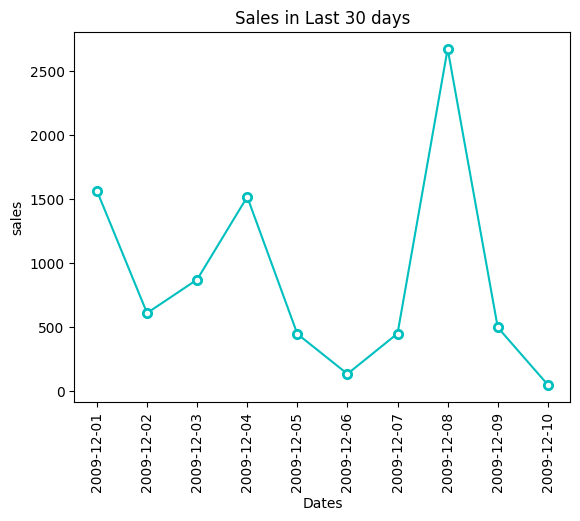

In [15]:
xx = []
yy = []

conn = hive.Connection(host="172.16.215.135", port=10000, username="cloudera")
cursor = conn.cursor()

# query = "SELECT date_format(sales_date,'DD-MM-YY'), purchases_total  from sales_per_date LIMIT 30"

query = """
SELECT date as sales_date, SUM(price) AS purchases_total
FROM retail_data
GROUP BY date
ORDER BY sales_date DESC
"""
cursor.execute(query)
results = cursor.fetchall()
for row in results:
    xx.append(row[0])
    yy.append(row[1])
    # print(row)
cursor.close()
conn.close()
xx = xx[::-1]
plt.xticks(rotation=90)
# plt.bar(xx, yy)

plt.plot(xx, yy, marker='o', markerfacecolor='white', markeredgewidth=2, color='c')

plt.xlabel('Dates')
plt.ylabel('sales')
plt.title('Sales in Last 30 days')
plt.show()


In [17]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Sample sales data (adapt and expand based on your actual data)
country_data = {
    'Country': ['United States', 'China', 'Japan', 'India', 'Germany', 'United Kingdom', 'France', 'Canada', 'Australia', 'Italy'],
    'Sales (Millions)': [120, 80, 50, 35, 25, 20, 18, 15, 12, 10]
}

# Create a Pandas DataFrame
df = pd.DataFrame(country_data)

# Merge country data with map data based on country names
merged_data = world_map.merge(df, on='Country')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
merged_data.plot(column='Sales (Millions)', cmap='Blues', ax=ax, edgecolor='0.8')

# Set title and remove axes
ax.set_title('Global Sales Heatmap (Millions)')
ax.axis('off')

plt.show()





ModuleNotFoundError: No module named 'geopandas'

In [24]:
import pandas as pd
import plotly.express as px
import plotly

xx = []
yy = []

conn = hive.Connection(host="172.16.215.135", port=10000, username="cloudera")
cursor = conn.cursor()

# query = "SELECT date_format(sales_date,'DD-MM-YY'), purchases_total  from sales_per_date LIMIT 30"

query = """
select * from
(
SELECT
   productname,
   strftime('%Y-%m', productname) as Month_Year,
   COUNT(*) as Num_of_Purchases,
   ROW_NUMBER() OVER(PARTITION BY strftime('%Y-%m', date) ORDER BY COUNT(*) DESC) as rank
FROM
    retail_data
GROUP BY 
    productname,Month_Year
ORDER BY
    Month_Year,Num_of_Purchases desc
    )
    
WHERE 
    rank <= 5
"""
cursor.execute(query)

df = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

cursor.close()
conn.close()

df


OperationalError: TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=["*org.apache.hive.service.cli.HiveSQLException:Error while compiling statement: FAILED: ParseException line 17:0 cannot recognize input near 'WHERE' 'rank' '<=' in subquery source:28:27", 'org.apache.hive.service.cli.operation.Operation:toSQLException:Operation.java:400', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:187', 'org.apache.hive.service.cli.operation.SQLOperation:runInternal:SQLOperation.java:271', 'org.apache.hive.service.cli.operation.Operation:run:Operation.java:337', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatementInternal:HiveSessionImpl.java:439', 'org.apache.hive.service.cli.session.HiveSessionImpl:executeStatement:HiveSessionImpl.java:405', 'sun.reflect.GeneratedMethodAccessor34:invoke::-1', 'sun.reflect.DelegatingMethodAccessorImpl:invoke:DelegatingMethodAccessorImpl.java:43', 'java.lang.reflect.Method:invoke:Method.java:498', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:78', 'org.apache.hive.service.cli.session.HiveSessionProxy:access$000:HiveSessionProxy.java:36', 'org.apache.hive.service.cli.session.HiveSessionProxy$1:run:HiveSessionProxy.java:63', 'java.security.AccessController:doPrivileged:AccessController.java:-2', 'javax.security.auth.Subject:doAs:Subject.java:422', 'org.apache.hadoop.security.UserGroupInformation:doAs:UserGroupInformation.java:1917', 'org.apache.hive.service.cli.session.HiveSessionProxy:invoke:HiveSessionProxy.java:59', 'com.sun.proxy.$Proxy19:executeStatement::-1', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:257', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatement:ThriftCLIService.java:501', 'org.apache.hive.service.cli.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1313', 'org.apache.hive.service.cli.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1298', 'org.apache.thrift.ProcessFunction:process:ProcessFunction.java:39', 'org.apache.thrift.TBaseProcessor:process:TBaseProcessor.java:39', 'org.apache.hive.service.auth.TSetIpAddressProcessor:process:TSetIpAddressProcessor.java:56', 'org.apache.thrift.server.TThreadPoolServer$WorkerProcess:run:TThreadPoolServer.java:286', 'java.util.concurrent.ThreadPoolExecutor:runWorker:ThreadPoolExecutor.java:1149', 'java.util.concurrent.ThreadPoolExecutor$Worker:run:ThreadPoolExecutor.java:624', 'java.lang.Thread:run:Thread.java:748', "*org.apache.hadoop.hive.ql.parse.ParseException:line 17:0 cannot recognize input near 'WHERE' 'rank' '<=' in subquery source:32:5", 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:204', 'org.apache.hadoop.hive.ql.parse.ParseDriver:parse:ParseDriver.java:166', 'org.apache.hadoop.hive.ql.Driver:compile:Driver.java:522', 'org.apache.hadoop.hive.ql.Driver:compileInternal:Driver.java:1356', 'org.apache.hadoop.hive.ql.Driver:compileAndRespond:Driver.java:1343', 'org.apache.hive.service.cli.operation.SQLOperation:prepare:SQLOperation.java:185'], sqlState='42000', errorCode=40000, errorMessage="Error while compiling statement: FAILED: ParseException line 17:0 cannot recognize input near 'WHERE' 'rank' '<=' in subquery source"), operationHandle=None)